In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

- data (prepare and load)
- build model
- fit model
- make predictions evaluate
- save and loading a model
- put it all together

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Loading the Data

In [33]:
## Data

# known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(1).to(device)
Y = weight * X + bias
X[:5], Y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [34]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], Y[:train_split]
X_test, y_test = X[train_split:], Y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

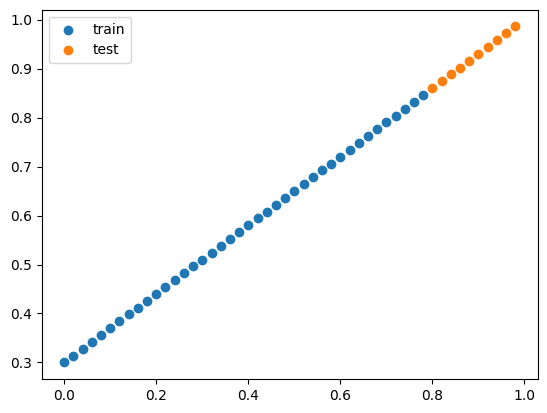

In [35]:
# plot
def plot_preds(predictions=None):
    plt.scatter(X_train, y_train, label='train')
    plt.scatter(X_test, y_test, label='test')
    if predictions is not None:
        plt.scatter(X_test, predictions, label='preds')
    plt.legend()
    
plot_preds()

# Build Model

In [36]:
# Build the model

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float)
        )
        self.bias = nn.Parameter(torch.randn(1, dtype=float))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [37]:
torch.manual_seed(42)

model_0 = LinearRegression()

model_0.to(device)

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [38]:
# Make predictions

with torch.inference_mode():
    y_preds = model_0(X_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

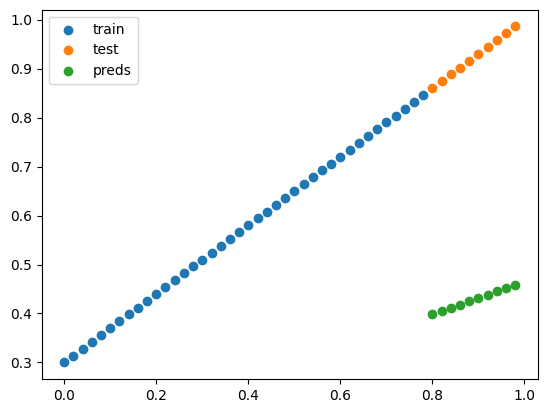

In [39]:
plot_preds(y_preds)

# Training

In [40]:
## Train model

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                         lr=0.01)

In [41]:
## Training Loop

EPOCHS = 150

train_losses = []
test_losses = []

for epoch in range(EPOCHS):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())
            
    

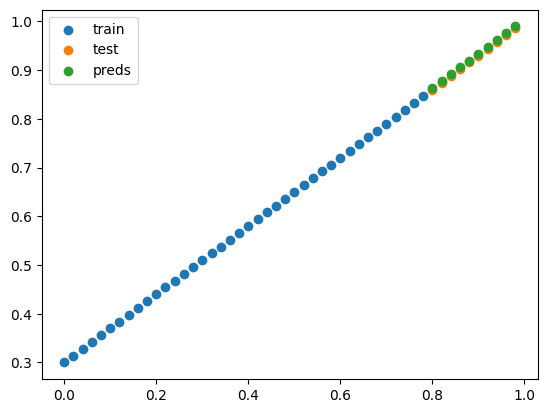

In [42]:
plot_preds(test_pred.detach().numpy())

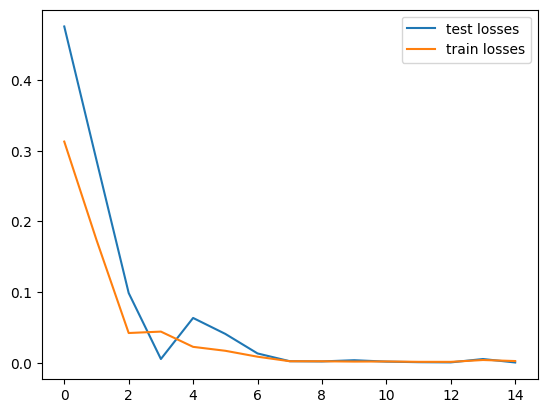

In [43]:
plt.plot(range(len(test_losses)), test_losses, label='test losses')
plt.plot(range(len(test_losses)), train_losses, label='train losses')
plt.legend()

In [44]:
print(weight, bias)
model_0.state_dict()

0.7 0.3


OrderedDict([('weights', tensor([0.7015])),
             ('bias', tensor([0.3021], dtype=torch.float64))])

# Saving and loading a model in Pytorch

In [45]:
# saving a model in pytorch

from pathlib import Path

MODELS_PATH = Path("..", "models")
MODELS_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = Path("linear_model.pt")
MODEL_PATH = MODELS_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_PATH)

In [46]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7015])),
             ('bias', tensor([0.3021], dtype=torch.float64))])

In [47]:
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f=MODEL_PATH))
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7015])),
             ('bias', tensor([0.3021], dtype=torch.float64))])

In [48]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8634],
        [0.8774],
        [0.8914],
        [0.9054],
        [0.9195],
        [0.9335],
        [0.9475],
        [0.9616],
        [0.9756],
        [0.9896]], dtype=torch.float64)